In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
data = pd.read_excel("/content/drive/MyDrive/Dataset.xlsx")

In [ ]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


**PRE-PROCESSING**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
data.dropna(inplace = True)

In [ ]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

DATA VISUALISATION

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


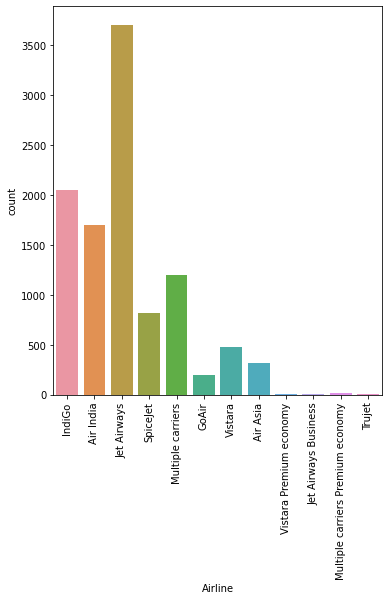

In [ ]:
plt.figure(figsize=(20,50))
plt.subplot(6,3,1)
sns.countplot(data['Airline'])
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


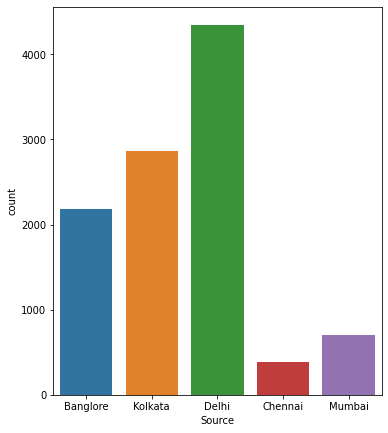

In [ ]:
plt.figure(figsize=(20,50))
plt.subplot(6,3,1)
sns.countplot(data['Source'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


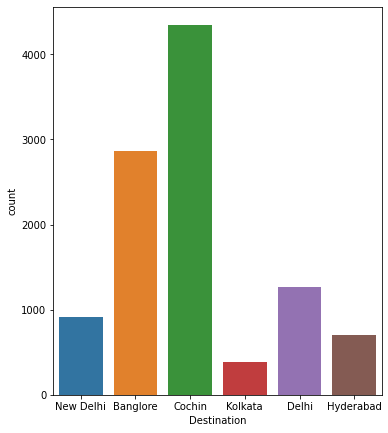

In [ ]:
plt.figure(figsize=(20,50))
plt.subplot(6,3,1)
sns.countplot(data['Destination'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


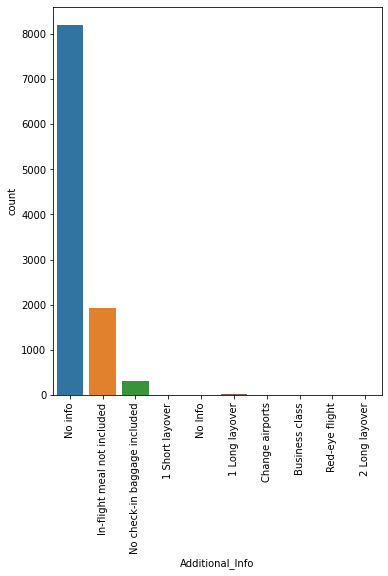

In [ ]:
plt.figure(figsize=(20,50))
plt.subplot(6,3,1)
sns.countplot(data['Additional_Info'])
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


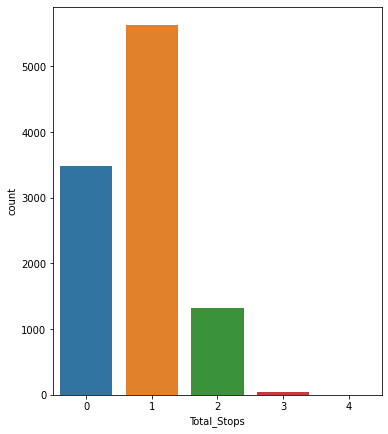

In [ ]:
plt.figure(figsize=(20,50))
plt.subplot(6,3,1)
sns.countplot(data['Total_Stops'])
plt.show()

Comparing price with different attributes

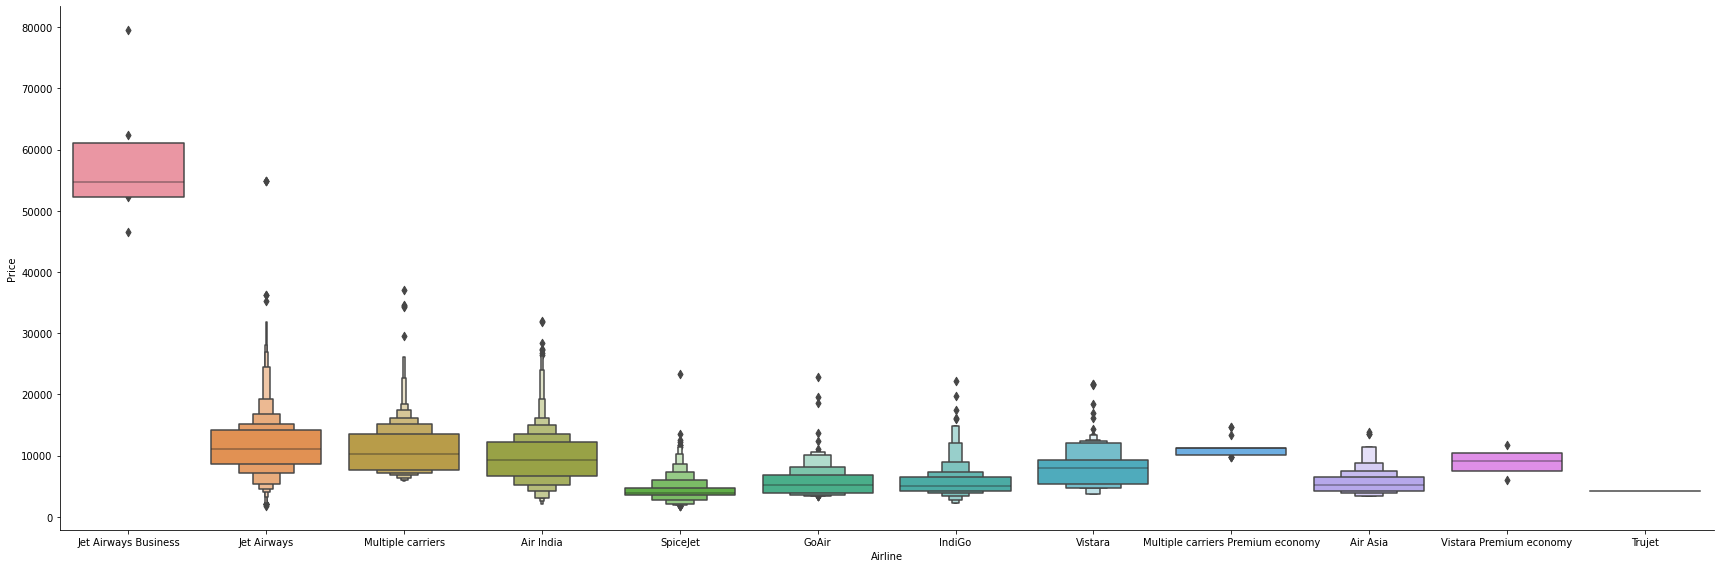

In [ ]:
sns.catplot(y = "Price", x = "Airline", data = data.sort_values("Price", ascending = False), kind="boxen", height = 8, aspect = 3)
plt.show()

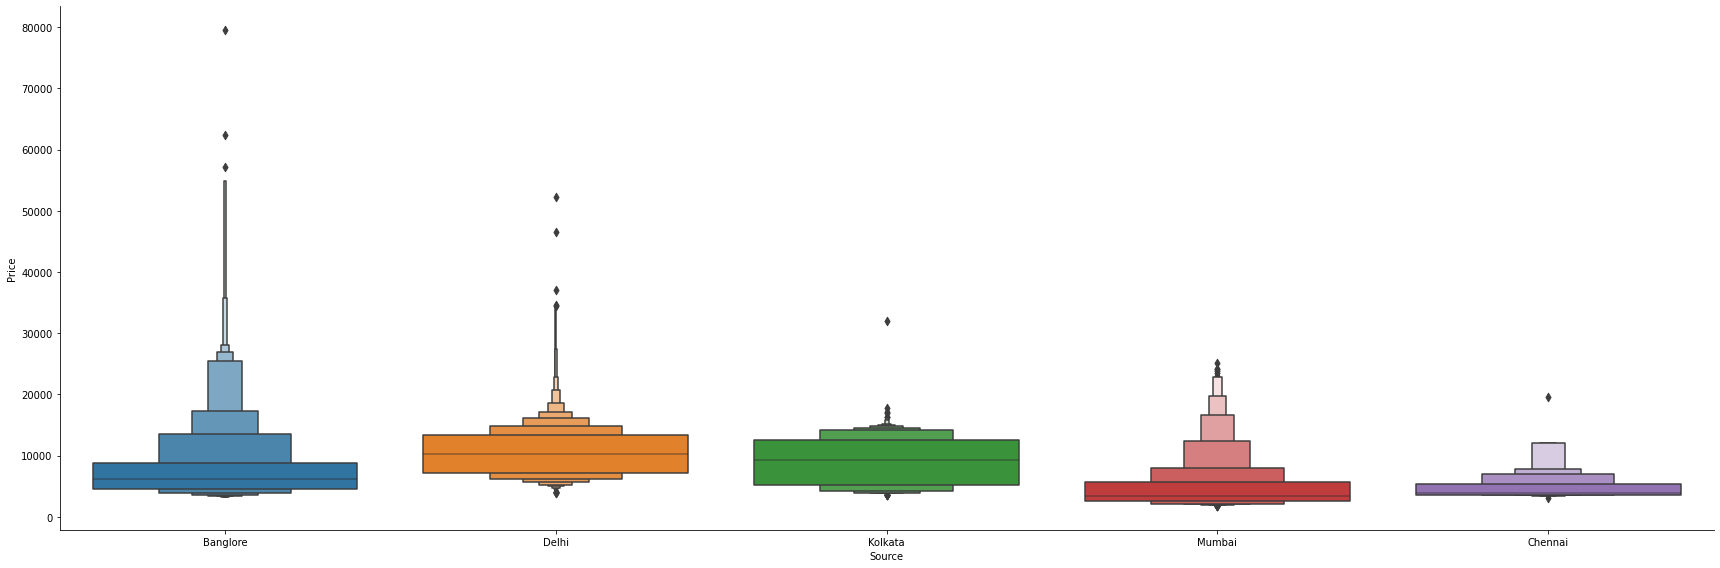

In [ ]:
sns.catplot(y = "Price", x = "Source", data = data.sort_values("Price", ascending = False), kind="boxen", height = 8, aspect = 3)
plt.show()

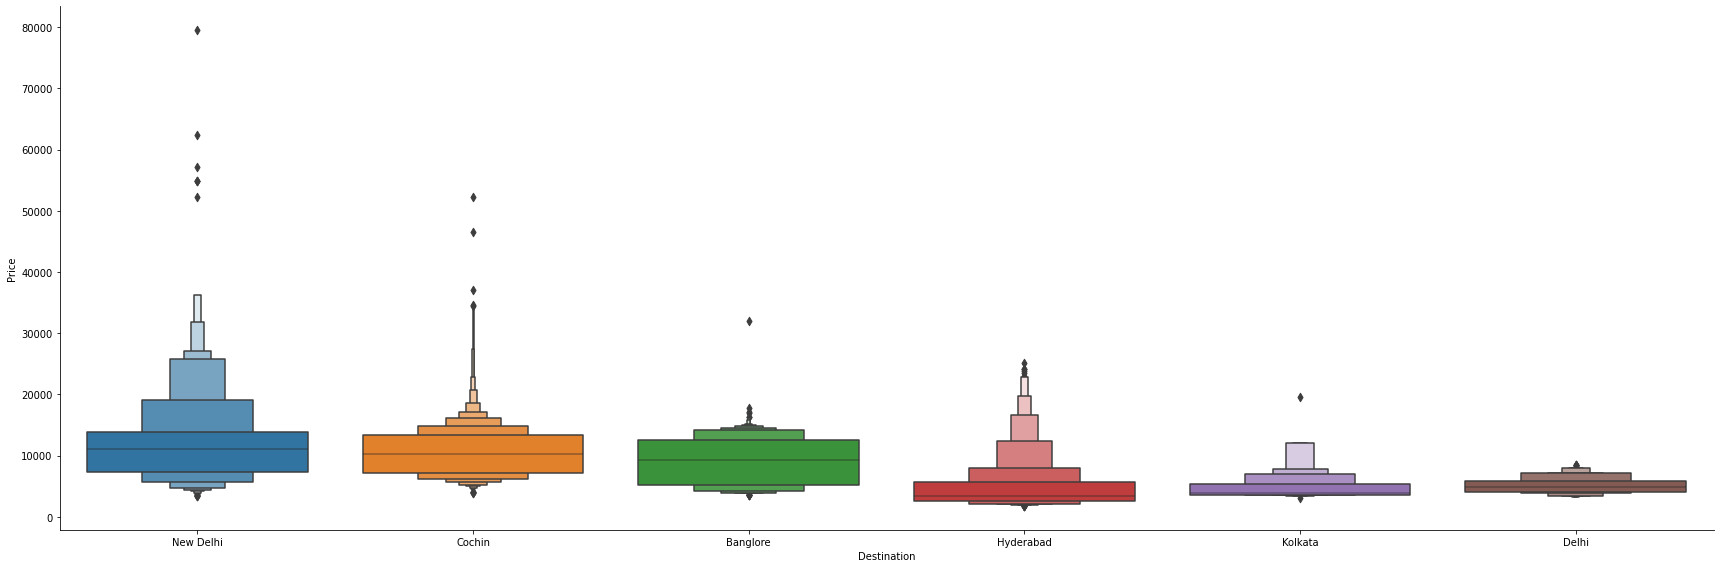

In [ ]:
sns.catplot(y = "Price", x = "Destination", data = data.sort_values("Price", ascending = False), kind="boxen", height = 8, aspect = 3)
plt.show()

In [ ]:
data[data.duplicated()].head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303


In [ ]:
data.drop_duplicates(keep='first',inplace=True)
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
data.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [ ]:
data = data.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4})

In [ ]:
data.Route.unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

we see that number of stops and route are interrelated so we can drop one of them and it will be easy if we drop the route column.

In [ ]:
data["Additional_Info"].value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [ ]:
df = data.drop(columns =['Route'])

In [ ]:
df['journey_day']=pd.to_datetime(df.Date_of_Journey, format='%d/%m/%Y').dt.day
df['journey_month']=pd.to_datetime(df.Date_of_Journey, format='%d/%m/%Y').dt.month

In [ ]:
df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,0,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1,No info,13302,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,19:55,22:25,2h 30m,0,No info,4107,9,4
10679,Air India,27/04/2019,Kolkata,Banglore,20:45,23:20,2h 35m,0,No info,4145,27,4
10680,Jet Airways,27/04/2019,Banglore,Delhi,08:20,11:20,3h,0,No info,7229,27,4
10681,Vistara,01/03/2019,Banglore,New Delhi,11:30,14:10,2h 40m,0,No info,12648,1,3


In [ ]:
df.drop(['Date_of_Journey'],axis=1,inplace=True)

In [ ]:
df['dep_hour']=pd.to_datetime(df.Dep_Time).dt.hour
df['dep_min']=pd.to_datetime(df.Dep_Time).dt.minute
df.drop(['Dep_Time'],axis=1,inplace=True)

In [ ]:
df

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,2h 50m,0,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,13:15,7h 25m,2,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,04:25 10 Jun,19h,2,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,23:30,5h 25m,1,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,21:35,4h 45m,1,No info,13302,1,3,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,22:25,2h 30m,0,No info,4107,9,4,19,55
10679,Air India,Kolkata,Banglore,23:20,2h 35m,0,No info,4145,27,4,20,45
10680,Jet Airways,Banglore,Delhi,11:20,3h,0,No info,7229,27,4,8,20
10681,Vistara,Banglore,New Delhi,14:10,2h 40m,0,No info,12648,1,3,11,30


In [ ]:
df['arr_hour']=pd.to_datetime(df.Arrival_Time).dt.hour
df['arr_min']=pd.to_datetime(df.Arrival_Time).dt.minute
df.drop(['Arrival_Time'],axis=1,inplace=True)

In [ ]:
df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min,arr_hour,arr_min
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1,No info,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,2h 30m,0,No info,4107,9,4,19,55,22,25
10679,Air India,Kolkata,Banglore,2h 35m,0,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,3h,0,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,2h 40m,0,No info,12648,1,3,11,30,14,10


In [ ]:
data["Duration"].value_counts()

2h 50m     544
1h 30m     386
2h 45m     335
2h 55m     332
2h 35m     329
          ... 
30h 25m      1
30h 15m      1
42h 5m       1
28h 55m      1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [ ]:
df['Duration'] = df['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [ ]:
df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min,arr_hour,arr_min
0,IndiGo,Banglore,New Delhi,170,0,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,445,2,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,1140,2,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,325,1,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,285,1,No info,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,150,0,No info,4107,9,4,19,55,22,25
10679,Air India,Kolkata,Banglore,155,0,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,180,0,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,160,0,No info,12648,1,3,11,30,14,10


In [ ]:
df['Duration(min)']=df['Duration']

In [ ]:
df.drop(['Duration'],axis=1,inplace=True)

In [ ]:
df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min,arr_hour,arr_min,Duration(min)
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,22,20,1,10,170
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,16,50,21,35,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,No info,4107,9,4,19,55,22,25,150
10679,Air India,Kolkata,Banglore,0,No info,4145,27,4,20,45,23,20,155
10680,Jet Airways,Banglore,Delhi,0,No info,7229,27,4,8,20,11,20,180
10681,Vistara,Banglore,New Delhi,0,No info,12648,1,3,11,30,14,10,160


In [ ]:
data["Airline"].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [ ]:
data["Source"].value_counts()

Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [ ]:
data["Destination"].value_counts()

Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [ ]:
df = df.replace({"Jet Airways":1,"IndiGo":2,"Air India":3,"Multiple carriers":4,"SpiceJet":5,"Vistara":6,"Air Asia":7,"GoAir":8,"Jet Airways Business":10,"Multiple carriers Premium economy":9,"Vistara Premium economy":11,"Trujet":12})

In [ ]:
df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min,arr_hour,arr_min,Duration(min)
0,2,Banglore,New Delhi,0,No info,3897,24,3,22,20,1,10,170
1,3,Kolkata,Banglore,2,No info,7662,1,5,5,50,13,15,445
2,1,Delhi,Cochin,2,No info,13882,9,6,9,25,4,25,1140
3,2,Kolkata,Banglore,1,No info,6218,12,5,18,5,23,30,325
4,2,Banglore,New Delhi,1,No info,13302,1,3,16,50,21,35,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,7,Kolkata,Banglore,0,No info,4107,9,4,19,55,22,25,150
10679,3,Kolkata,Banglore,0,No info,4145,27,4,20,45,23,20,155
10680,1,Banglore,Delhi,0,No info,7229,27,4,8,20,11,20,180
10681,6,Banglore,New Delhi,0,No info,12648,1,3,11,30,14,10,160


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Source']= label_encoder.fit_transform(df['Source']) 
df['Destination']= label_encoder.fit_transform(df['Destination']) 
df['Additional_Info']= label_encoder.fit_transform(df['Additional_Info']) 

In [ ]:
df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min,arr_hour,arr_min,Duration(min)
0,2,0,5,0,8,3897,24,3,22,20,1,10,170
1,3,3,0,2,8,7662,1,5,5,50,13,15,445
2,1,2,1,2,8,13882,9,6,9,25,4,25,1140
3,2,3,0,1,8,6218,12,5,18,5,23,30,325
4,2,0,5,1,8,13302,1,3,16,50,21,35,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,7,3,0,0,8,4107,9,4,19,55,22,25,150
10679,3,3,0,0,8,4145,27,4,20,45,23,20,155
10680,1,0,2,0,8,7229,27,4,8,20,11,20,180
10681,6,0,5,0,8,12648,1,3,11,30,14,10,160


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


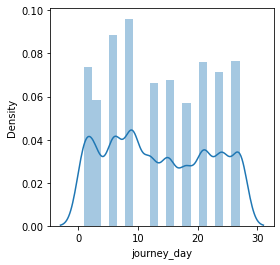

In [ ]:
plt.figure(figsize=(4,4))
sns.distplot(df.journey_day)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


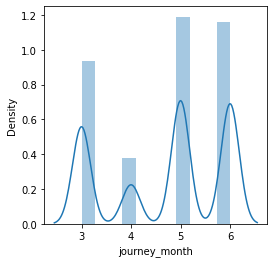

In [ ]:
plt.figure(figsize=(4,4))
sns.distplot(df.journey_month)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


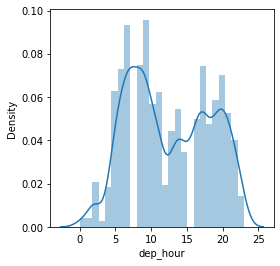

In [ ]:
plt.figure(figsize=(4,4))
sns.distplot(df.dep_hour)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


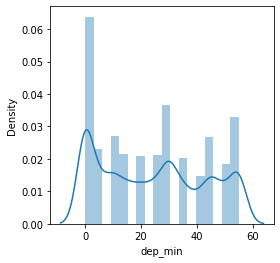

In [ ]:
plt.figure(figsize=(4,4))
sns.distplot(df.dep_min)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


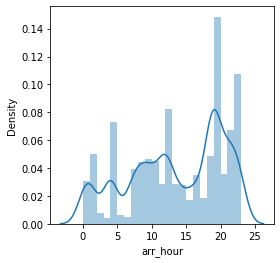

In [ ]:
plt.figure(figsize=(4,4))
sns.distplot(df.arr_hour)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


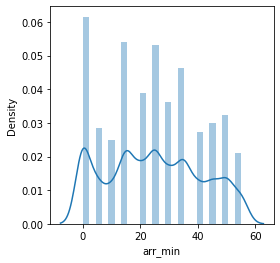

In [ ]:
plt.figure(figsize=(4,4))
sns.distplot(df.arr_min)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


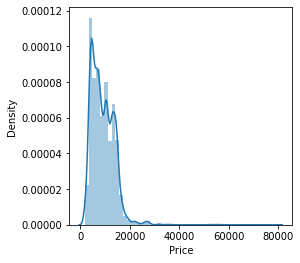

In [ ]:
plt.figure(figsize=(4,4))
sns.distplot(df.Price)

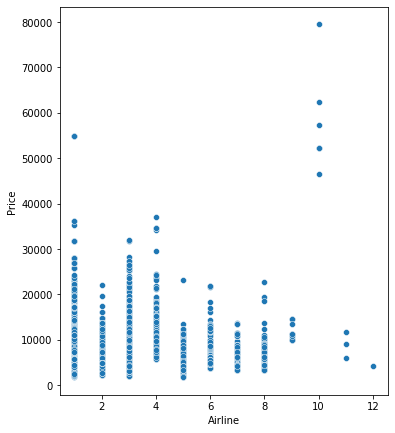

In [ ]:
plt.figure(figsize=(20,50))
plt.subplot(6,3,1)
sns.scatterplot(x=df['Airline'],y=df.Price)
plt.show()

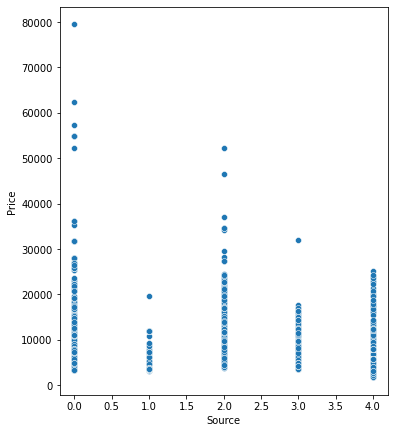

In [ ]:
plt.figure(figsize=(20,50))
plt.subplot(6,3,1)
sns.scatterplot(x=df['Source'],y=df.Price)
plt.show()

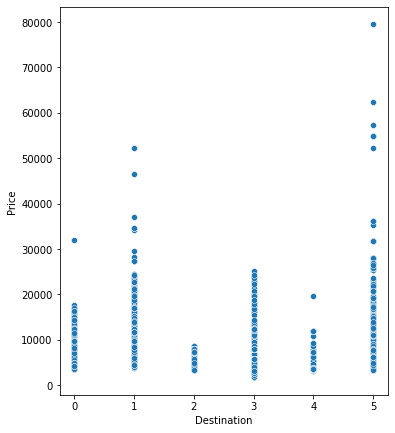

In [ ]:
plt.figure(figsize=(20,50))
plt.subplot(6,3,1)
sns.scatterplot(x=df['Destination'],y=df.Price)
plt.show()

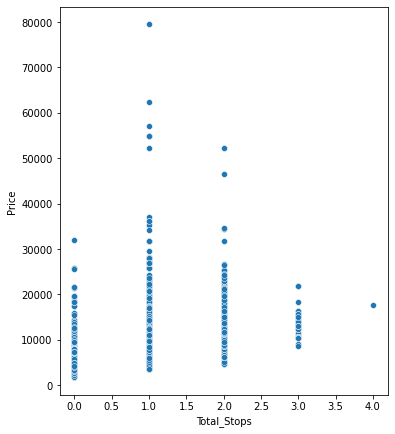

In [ ]:
plt.figure(figsize=(20,50))
plt.subplot(6,3,1)
sns.scatterplot(x=df['Total_Stops'],y=df.Price)
plt.show()

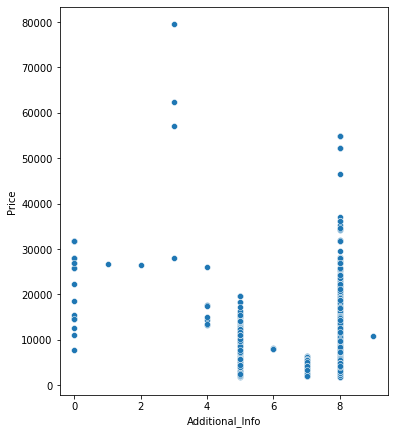

In [ ]:
plt.figure(figsize=(20,50))
plt.subplot(6,3,1)
sns.scatterplot(x=df['Additional_Info'],y=df.Price)
plt.show()

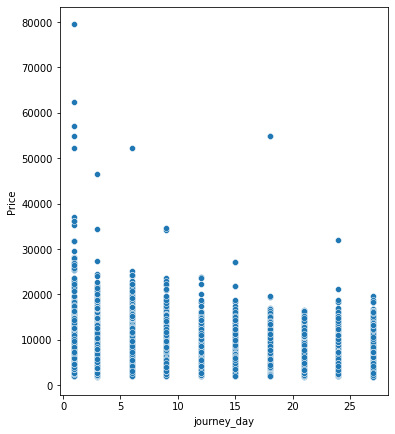

In [ ]:
plt.figure(figsize=(20,50))
plt.subplot(6,3,1)
sns.scatterplot(x=df['journey_day'],y=df.Price)
plt.show()

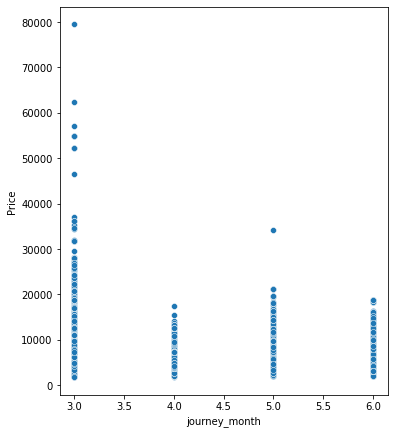

In [ ]:
plt.figure(figsize=(20,50))
plt.subplot(6,3,1)
sns.scatterplot(x=df['journey_month'],y=df.Price)
plt.show()

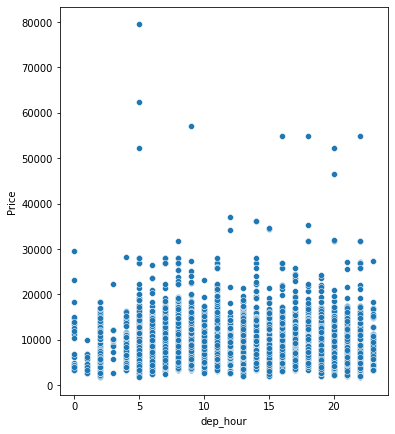

In [ ]:
plt.figure(figsize=(20,50))
plt.subplot(6,3,1)
sns.scatterplot(x=df['dep_hour'],y=df.Price)
plt.show()

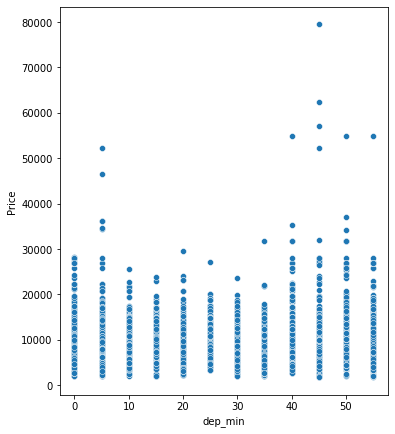

In [ ]:
plt.figure(figsize=(20,50))
plt.subplot(6,3,1)
sns.scatterplot(x=df['dep_min'],y=df.Price)
plt.show()

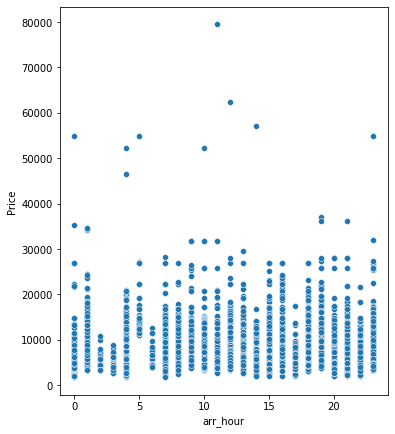

In [ ]:
plt.figure(figsize=(20,50))
plt.subplot(6,3,1)
sns.scatterplot(x=df['arr_hour'],y=df.Price)
plt.show()

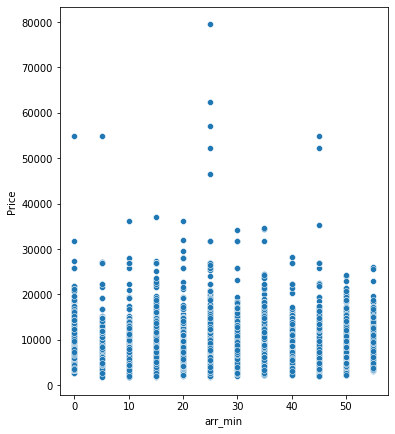

In [ ]:
plt.figure(figsize=(20,50))
plt.subplot(6,3,1)
sns.scatterplot(x=df['arr_min'],y=df.Price)
plt.show()

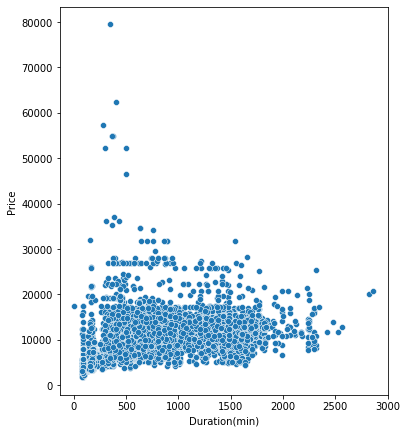

In [ ]:
plt.figure(figsize=(20,50))
plt.subplot(6,3,1)
sns.scatterplot(x=df['Duration(min)'],y=df.Price)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# col_names = ['Total_Stops', 'journey_day', 'journey_month','dep_hour','dep_min','arr_hour','arr_min','Duration(min)','Additional_Info']
# features = df[col_names]
# features = scaler.fit_transform(features.values)

In [ ]:
Y = df.loc[:,'Price']

In [ ]:
d_X = df.loc[:,['Airline','Source','Destination','Total_Stops','Additional_Info','journey_day','journey_month','dep_hour','dep_min','arr_hour','arr_min','Duration(min)']]

In [ ]:
X = scaler.fit_transform(d_X)

In [ ]:
X

array([[-0.39646171, -1.64687738,  2.40421327, ..., -1.8070449 ,
        -0.88836709, -0.91832323],
       [ 0.14375481,  0.88205718, -0.97201213, ..., -0.05655381,
        -0.58661071, -0.36906486],
       [-0.93667823,  0.03907899, -0.29676705, ..., -1.36942213,
         0.01690205,  1.01906085],
       ...,
       [-0.93667823, -1.64687738,  0.37847803, ..., -0.34830233,
        -0.28485433, -0.8983502 ],
       [ 1.76440436, -1.64687738,  2.40421327, ...,  0.08932044,
        -0.88836709, -0.93829626],
       [ 0.14375481,  0.03907899, -0.29676705, ...,  0.81869173,
        -0.58661071, -0.25921318]])

In [ ]:
Y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10462, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)

In [ ]:
x_train

array([[-0.39646171, -1.64687738,  2.40421327, ..., -0.05655381,
        -1.49187984, -0.91832323],
       [-0.93667823, -1.64687738,  2.40421327, ..., -0.20242807,
         0.01690205,  0.53970809],
       [-0.39646171, -1.64687738,  0.37847803, ..., -1.51529639,
         0.01690205, -0.90833672],
       ...,
       [ 0.14375481,  0.88205718, -0.97201213, ...,  0.96456599,
         0.01690205,  1.96777986],
       [ 1.22418784, -0.80389919,  1.72896819, ..., -0.49417659,
         0.62041481, -0.98822884],
       [ 0.14375481,  0.88205718, -0.97201213, ..., -0.34830233,
        -1.19012346,  0.6695328 ]])

In [ ]:
y_test

3387    10262
3993     5642
7969     4823
89      10703
899     14571
        ...  
471      8669
7139    11560
1379     3858
1901    15129
5316     4049
Name: Price, Length: 3139, dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestRegressor as rsr

In [ ]:
model1 = rsr()
model1.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred1 = model1.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

In [ ]:
print("r2_score:", r2_score(y_test,y_pred1))
print("mean_absolute_error:",mean_absolute_error(y_test,y_pred1) )
print("mean_squared_error:",mean_squared_error(y_test,y_pred1))

r2_score: 0.8861440573087951
mean_absolute_error: 714.0794939509094
mean_squared_error: 2430881.013025968


In [ ]:
from sklearn.tree import DecisionTreeRegressor as dtr

In [ ]:
model2 = dtr()
model2.fit(x_train,y_train)
y_pred2 = model2.predict(x_test)

In [ ]:
print("r2_score:", r2_score(y_test,y_pred2))
print("mean_absolute_error:",mean_absolute_error(y_test,y_pred2) )
print("mean_squared_error:",mean_squared_error(y_test,y_pred2))

r2_score: 0.7747869798588183
mean_absolute_error: 837.1451099076139
mean_squared_error: 4808410.010114687


In [ ]:
from sklearn.neighbors import KNeighborsRegressor as knr

In [ ]:
model3 = knr()
model3.fit(x_train,y_train)
y_pred3 = model3.predict(x_test)

In [ ]:
print("r2_score:", r2_score(y_test,y_pred3))
print("mean_absolute_error:",mean_absolute_error(y_test,y_pred3) )
print("mean_squared_error:",mean_squared_error(y_test,y_pred3))

r2_score: 0.7509613040419841
mean_absolute_error: 1270.0046511627907
mean_squared_error: 5317100.040662631


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor as gdr

In [ ]:
model4 = gdr()
model4.fit(x_train,y_train)
y_pred4 = model4.predict(x_test)

In [ ]:
print("r2_score:", r2_score(y_test,y_pred4))
print("mean_absolute_error:",mean_absolute_error(y_test,y_pred4) )
print("mean_squared_error:",mean_squared_error(y_test,y_pred4))

r2_score: 0.811234356475521
mean_absolute_error: 1275.9205363678388
mean_squared_error: 4030240.3889430948


**Hyper parameter tuning using randomizedSearchCV**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV as rcr

In [ ]:
param1 = {'n_estimators':[10,30,50,70,90,100,120,140],'max_depth':[None,2,4,6,8,10],'max_samples':[20,50,100,120,150,200,250],'min_samples_split':[None,2,4,6,8,10]}

In [ ]:
class1= rsr()

In [ ]:
rfr1 = rcr(class1,param1,cv=5)

In [ ]:
x_train

array([[-0.39646171, -1.64687738,  2.40421327, ..., -0.05655381,
        -1.49187984, -0.91832323],
       [-0.93667823, -1.64687738,  2.40421327, ..., -0.20242807,
         0.01690205,  0.53970809],
       [-0.39646171, -1.64687738,  0.37847803, ..., -1.51529639,
         0.01690205, -0.90833672],
       ...,
       [ 0.14375481,  0.88205718, -0.97201213, ...,  0.96456599,
         0.01690205,  1.96777986],
       [ 1.22418784, -0.80389919,  1.72896819, ..., -0.49417659,
         0.62041481, -0.98822884],
       [ 0.14375481,  0.88205718, -0.97201213, ..., -0.34830233,
        -1.19012346,  0.6695328 ]])

In [ ]:
res1 = rfr1.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/parall

In [ ]:
res1.best_params_

{'max_depth': 8,
 'max_samples': 250,
 'min_samples_split': 6,
 'n_estimators': 50}

In [ ]:
params3 = {'max_depth': [None,1,2,3,4,5,6], 'min_samples_split':[2,4,6,8,10], 'min_samples_leaf':[1,2,3,4,5,6], 'max_leaf_nodes': [None,1,2,3,4,5]}

In [ ]:
class2= dtr()

In [ ]:
rfr2 = rcr(class2,params3,cv=5)

In [ ]:
res2 = rfr2.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 1320, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 316, in fit
    max_leaf_nodes
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn(some

In [ ]:
res2.best_params_

{'max_depth': 3,
 'max_leaf_nodes': 5,
 'min_samples_leaf': 6,
 'min_samples_split': 2}

In [ ]:
params4 = {'n_estimators':[10,50,100,150,200],'alpha':[0.09,0.1,0.5,0.9],'learning_rate':[0.01,0.1,0.2],'max_depth':[2,3,4,5],'min_samples_leaf':[1,2,3,4,5],'min_samples_split':[2,3]}

In [ ]:
from sklearn.model_selection import GridSearchCV as gcr

In [ ]:
class3 = gdr()
rfr3 = rcr(class3,params4,cv=5)

In [ ]:
res3 = rfr3.fit(x_train,y_train)
res3.best_params_

{'alpha': 0.09,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 3,
 'n_estimators': 200}

Fitting model using the new best parameters.

In [ ]:
model4_new = gdr(alpha=0.09,learning_rate=0.1,max_depth=5,min_samples_leaf=4,min_samples_split=3,n_estimators=200)

In [ ]:
model4_new.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.09, max_depth=5, min_samples_leaf=4,
                          min_samples_split=3, n_estimators=200)

In [ ]:
pre = model4_new.predict(x_test)

In [ ]:
print("r2_score:", r2_score(y_test,pre))
print("mean_absolute_error:",mean_absolute_error(y_test,pre) )
print("mean_squared_error:",mean_squared_error(y_test,pre))

r2_score: 0.8838692800846899
mean_absolute_error: 895.0772442804578
mean_squared_error: 2479448.638327167
